# 1. 필요 라이브러리 가져오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

colors = ["red", "blue"]
sns.set_palette(sns.color_palette(colors))

# 2. 데이터 로드하기

In [2]:
df_lol = pd.read_csv('/content/drive/MyDrive/data/lol/high_diamond_ranked_10min.csv')

In [3]:
df_lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


* lol은 두 팀(파랑과 빨강)이 대결하는 MOBA(Multiplayer Online Battle Arena)입니다. 탑,정글,미드,AD,서폿 5개의 역할이 있습니다.
* 위 데이터는 다이아1 ~ 마스터까지의 높은 수준의 게임 유저들의 플레이 결과 데이터이고 게임 시작 후 10분까지의 결과를 나타낸 데이터입니다.

In [ ]:
df_lol.shape

(9879, 40)

* 총 9879개의 데이터와 40개의 변수가 존재하는 데이터이다.

In [ ]:
df_lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

* 위 데이터에 결측치는 없다.

# 3. 변수 별 시각화하기

## 3.1 BlueWins(target)

In [15]:
df_lol['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

* 블루팀이 이겼으면 1, 레드팀이 이겼으면 0입니다.
* 데이터 중 레드팀이 이긴 게임은 4949개 블루팀이 이긴 게임은 4930개 입니다.

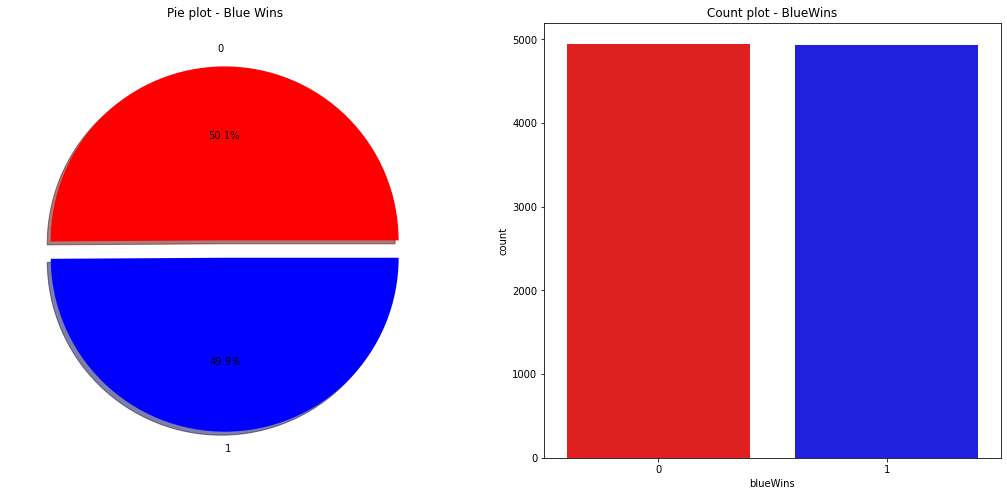

In [16]:
f, ax = plt.subplots(1, 2, figsize = (18,8))


df_lol['blueWins'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Blue Wins')
ax[0].set_ylabel('')
sns.countplot('blueWins', data=df_lol, ax=ax[1])
ax[1].set_title('Count plot - BlueWins')

plt.show()

## 3.2 Wards 관련 변수들

* 와드(wards) : 아군에게 주변 지역을 밝혀주는 아이템

* BlueWardsPlaced : 블루 팀이 10분동안 설치한 와드 수
* BlueWardsDestroyed : 블루 팀이 10분동안 제거한 레드 팀 와드 수
* RedWardsPlaced : 레드 팀이 10분 동안 설치한 와드 수
* RedWardsDestroyed : 레드 팀이 10분동안 제거한 블루 팀 와드 수

In [8]:
# 와드 관련 변수 + target 변수들로만 데이터 셋 만들기
df_wards = df_lol[['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'redWardsPlaced', 'redWardsDestroyed']]
df_wards

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
0,0,28,2,15,6
1,0,12,1,12,1
2,0,15,0,15,3
3,0,43,1,15,2
4,0,75,4,17,2
...,...,...,...,...,...
9874,1,17,2,46,3
9875,1,54,0,12,21
9876,0,23,1,14,0
9877,0,14,4,66,4


In [5]:
df_wards.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,22.367952,2.723150
std,0.500024,18.019177,2.174998,18.457427,2.138356
min,0.000000,5.000000,0.000000,6.000000,0.000000
25%,0.000000,14.000000,1.000000,14.000000,1.000000
50%,0.000000,16.000000,3.000000,16.000000,2.000000
75%,1.000000,20.000000,4.000000,20.000000,4.000000
max,1.000000,250.000000,27.000000,276.000000,24.000000


* 블루팀 레드팀 모두 평균 22개의 와드를 설치하고 3개 정도의 와드를 제거하는 것으로 보인다.
* 특이한 점은 설치한 와드 수의 최대값이다. 10분동안 200개 이상의 와드를 설치하는 것은 불가능할 것 같다.

In [ ]:
df_wards[df_wards['blueWardsPlaced'] == 250]

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
8206,1,250,4,16,1


In [ ]:
df_wards[df_wards['redWardsPlaced'] == 276]

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
2713,0,16,3,276,1


In [ ]:
df_wards[df_wards['blueWardsDestroyed'] == 27]

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
5712,0,13,27,45,4


In [ ]:
df_wards[df_wards['redWardsDestroyed'] == 24]

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
2057,1,41,3,19,24
7806,0,47,1,35,24
9674,0,65,2,17,24


### 3.2.1 와드를 더 많이 설치하면 게임을 이겼을까??

In [9]:
# 블루팀이 와드를 더 많이 설치한 데이터
df_blue_wards = df_wards[df_wards['blueWardsPlaced'] > df_wards['redWardsPlaced']]
df_blue_wards

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
0,0,28,2,15,6
3,0,43,1,15,2
4,0,75,4,17,2
7,0,16,2,15,0
8,0,16,3,15,2
...,...,...,...,...,...
9870,1,46,2,11,0
9873,1,18,2,16,6
9875,1,54,0,12,21
9876,0,23,1,14,0


In [10]:
# 레드팀이 와드를 더 많이 설치한 데이터
df_red_wards = df_wards[df_wards['blueWardsPlaced'] < df_wards['redWardsPlaced']]
df_red_wards

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
5,1,18,0,36,5
6,1,18,3,57,1
9,1,13,1,16,2
13,0,14,3,20,3
14,1,15,3,102,1
...,...,...,...,...,...
9869,0,12,1,13,3
9871,0,12,2,17,4
9872,1,12,0,60,3
9874,1,17,2,46,3


In [11]:
# 같은 수의 와드를 설치한 데이터
df_same_wards = df_wards[df_wards['blueWardsPlaced'] == df_wards['redWardsPlaced']]
df_same_wards

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
1,0,12,1,12,1
2,0,15,0,15,3
29,0,18,5,18,3
60,0,18,4,18,3
74,1,15,3,15,2
...,...,...,...,...,...
9802,0,19,2,19,3
9804,0,14,3,14,3
9832,0,20,5,20,7
9848,1,12,3,12,2


In [21]:
df_blue_wards['blueWins'].value_counts()

1    2440
0    2165
Name: blueWins, dtype: int64

In [22]:
df_red_wards['blueWins'].value_counts()

0    2419
1    2113
Name: blueWins, dtype: int64

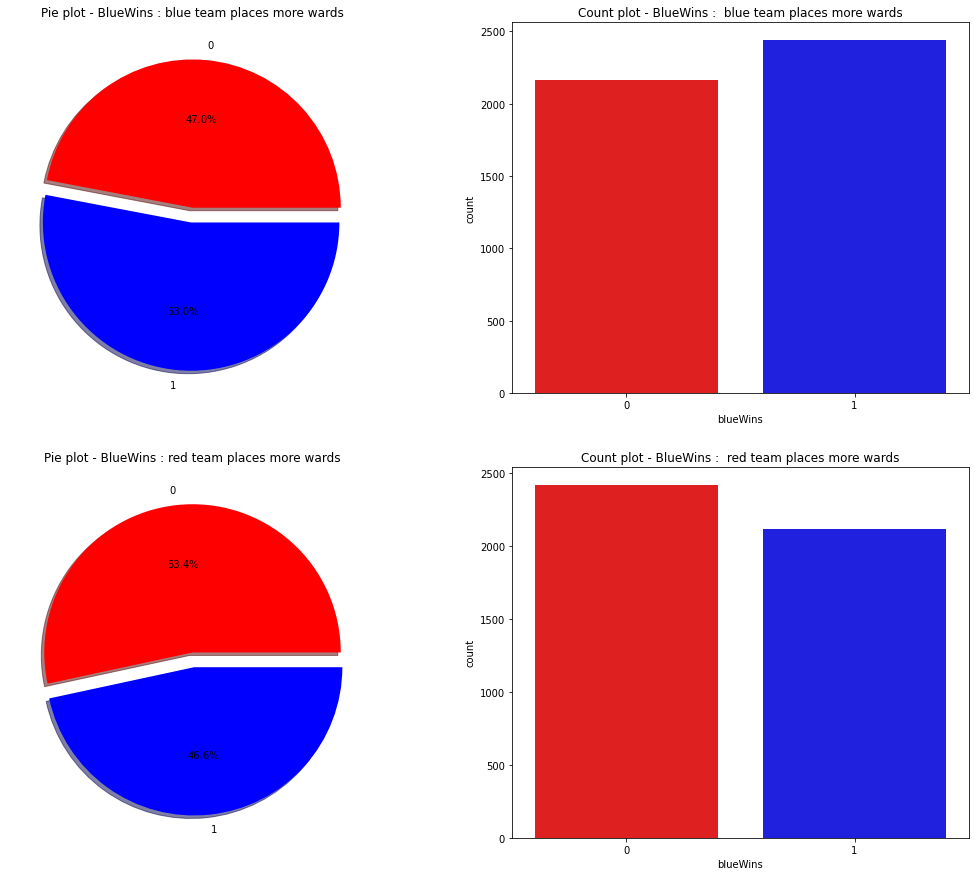

In [27]:
f, ax = plt.subplots(2, 2, figsize = (18,15))


df_blue_wards['blueWins'].value_counts().sort_values().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0, 0], shadow=True)
ax[0, 0].set_title('Pie plot - BlueWins : blue team places more wards')
ax[0, 0].set_ylabel('')
sns.countplot('blueWins', data=df_blue_wards, ax=ax[0, 1])
ax[0, 1].set_title('Count plot - BlueWins :  blue team places more wards')

df_red_wards['blueWins'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1, 0], shadow=True)
ax[1, 0].set_title('Pie plot - BlueWins : red team places more wards')
ax[1, 0].set_ylabel('')
sns.countplot('blueWins', data=df_red_wards, ax=ax[1, 1])
ax[1, 1].set_title('Count plot - BlueWins :  red team places more wards')

plt.show()

* 총 9879개 데이터
    * 블루팀이 더 많이 설치 : 4605 -> 2440게임 승리 : 53%
    * 레드팀이 더 많이 설치 : 4532 -> 2419게임 승리 : 53.4%
    * 같은 수의 와드 설치 : 742

* **결론 : 53%정도의 확률로 와드를 더 많이 설치한 팀이 게임을 이겼다.** 

### 3.2.2 상대 와드를 많이 제거하면 게임을 이겼을까?

In [28]:
# 블루팀이 와드를 더 많이 제거한 데이터
df_blue_wards_2 = df_wards[df_wards['blueWardsDestroyed'] > df_wards['redWardsDestroyed']]
df_blue_wards_2

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
4,0,75,4,17,2
6,1,18,3,57,1
7,0,16,2,15,0
8,0,16,3,15,2
10,0,20,3,15,2
...,...,...,...,...,...
9860,1,85,3,13,1
9865,1,34,1,15,0
9868,1,16,4,21,2
9870,1,46,2,11,0


In [29]:
# 레드팀이 와드를 더 많이 제거한 데이터
df_red_wards_2 = df_wards[df_wards['blueWardsDestroyed'] < df_wards['redWardsDestroyed']]
df_red_wards_2

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
0,0,28,2,15,6
2,0,15,0,15,3
3,0,43,1,15,2
5,1,18,0,36,5
9,1,13,1,16,2
...,...,...,...,...,...
9872,1,12,0,60,3
9873,1,18,2,16,6
9874,1,17,2,46,3
9875,1,54,0,12,21


In [30]:
# 같은 수의 와드를 제거한 데이터
df_same_wards_2 = df_wards[df_wards['blueWardsDestroyed'] == df_wards['redWardsDestroyed']]
df_same_wards_2

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed
1,0,12,1,12,1
12,1,18,1,12,1
13,0,14,3,20,3
24,1,33,3,18,3
44,0,18,4,39,4
...,...,...,...,...,...
9861,0,36,3,40,3
9862,1,13,3,14,3
9864,1,57,3,16,3
9866,1,16,3,38,3


In [31]:
df_blue_wards_2['blueWins'].value_counts()

1    2260
0    1879
Name: blueWins, dtype: int64

In [33]:
df_red_wards_2['blueWins'].value_counts()

0    2131
1    1723
Name: blueWins, dtype: int64

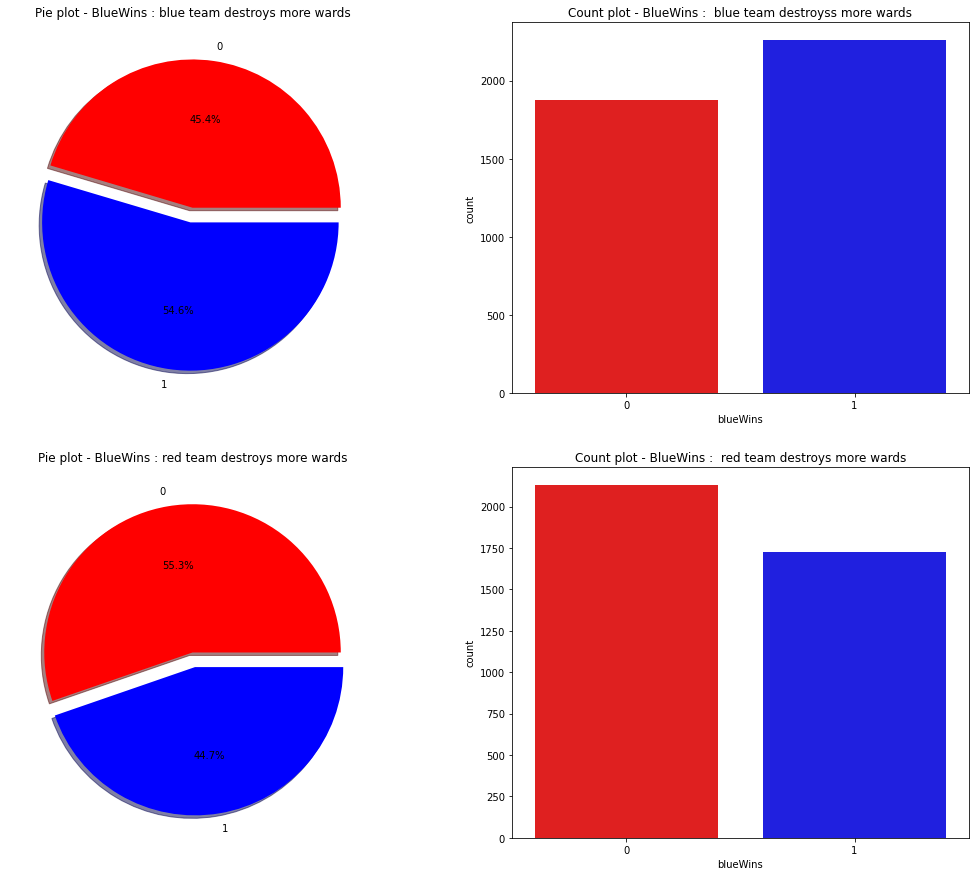

In [34]:
f, ax = plt.subplots(2, 2, figsize = (18,15))


df_blue_wards_2['blueWins'].value_counts().sort_values().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0, 0], shadow=True)
ax[0, 0].set_title('Pie plot - BlueWins : blue team destroys more wards')
ax[0, 0].set_ylabel('')
sns.countplot('blueWins', data=df_blue_wards_2, ax=ax[0, 1])
ax[0, 1].set_title('Count plot - BlueWins :  blue team destroyss more wards')

df_red_wards_2['blueWins'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1, 0], shadow=True)
ax[1, 0].set_title('Pie plot - BlueWins : red team destroys more wards')
ax[1, 0].set_ylabel('')
sns.countplot('blueWins', data=df_red_wards_2, ax=ax[1, 1])
ax[1, 1].set_title('Count plot - BlueWins :  red team destroys more wards')

plt.show()

* 총 9879개 데이터
    * 블루팀이 더 많이 제거 : 4139 -> 2260게임 승리 : 54.6%
    * 레드팀이 더 많이 제거 : 3854 -> 2131게임 승리 : 55.3%
    * 같은 수의 와드 제거 : 1886

* **결론 : 55%정도의 확률로 와드를 더 많이 제거한 팀이 게임을 이겼다.** 

### 3.2.3 상대방의 와드를 제거한 수가 아닌 상대가 설치한 와드 수 대비 제거한 와드 비율이 높은 팀이 게임을 이겼을까?

* 예를 들어 어떤 게임에서는 30개의 와드 중 4개를 지우고 어떤 게임에서는 10개의 와드 중 4개를 지울 수 있다. 이런 경우 후자가 더 이길 확률이 높을 것 같다. 즉, 단순히 제거한 와드 수를 중점으로 두는 것 보다는 상대가 설치한 와드 수 대비 제거한 와드 수가 높아야 효율적일 것 같다.

In [38]:
# 블루팀이 레드팀이 설치한 와드 수 대비 제거한 와드 수 변수 생성
df_wards['bWD/rWP'] = df_wards['blueWardsDestroyed'] / df_wards['redWardsPlaced']

# 레드팀이 블루팀이 설치한 와드 수 대비 제거한 와드 수 변수 생성
df_wards['rWD/bWP'] = df_wards['redWardsDestroyed'] / df_wards['blueWardsPlaced']

df_wards 

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed,bWD/rWP,rWD/bWP
0,0,28,2,15,6,0.133333,0.214286
1,0,12,1,12,1,0.083333,0.083333
2,0,15,0,15,3,0.000000,0.200000
3,0,43,1,15,2,0.066667,0.046512
4,0,75,4,17,2,0.235294,0.026667
...,...,...,...,...,...,...,...
9874,1,17,2,46,3,0.043478,0.176471
9875,1,54,0,12,21,0.000000,0.388889
9876,0,23,1,14,0,0.071429,0.000000
9877,0,14,4,66,4,0.060606,0.285714


In [39]:
# 블루팀이 높은 효율로 와드를 제거한 데이터
df_blue_wards_3 = df_wards[df_wards['bWD/rWP'] > df_wards['rWD/bWP']]
df_blue_wards_3

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed,bWD/rWP,rWD/bWP
3,0,43,1,15,2,0.066667,0.046512
4,0,75,4,17,2,0.235294,0.026667
7,0,16,2,15,0,0.133333,0.000000
8,0,16,3,15,2,0.200000,0.125000
10,0,20,3,15,2,0.200000,0.100000
...,...,...,...,...,...,...,...
9864,1,57,3,16,3,0.187500,0.052632
9865,1,34,1,15,0,0.066667,0.000000
9868,1,16,4,21,2,0.190476,0.125000
9870,1,46,2,11,0,0.181818,0.000000


In [40]:
# 레드팀이 높은 효율로 와드를 제거한 데이터
df_red_wards_3 = df_wards[df_wards['bWD/rWP'] < df_wards['rWD/bWP']]
df_red_wards_3

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed,bWD/rWP,rWD/bWP
0,0,28,2,15,6,0.133333,0.214286
2,0,15,0,15,3,0.000000,0.200000
5,1,18,0,36,5,0.000000,0.277778
6,1,18,3,57,1,0.052632,0.055556
9,1,13,1,16,2,0.062500,0.153846
...,...,...,...,...,...,...,...
9873,1,18,2,16,6,0.125000,0.333333
9874,1,17,2,46,3,0.043478,0.176471
9875,1,54,0,12,21,0.000000,0.388889
9877,0,14,4,66,4,0.060606,0.285714


In [41]:
# 같은 효율 데이터
df_same_wards_3 = df_wards[df_wards['bWD/rWP'] == df_wards['rWD/bWP']]
df_same_wards_3

,blueWins,blueWardsPlaced,blueWardsDestroyed,redWardsPlaced,redWardsDestroyed,bWD/rWP,rWD/bWP
1,0,12,1,12,1,0.083333,0.083333
56,0,17,0,14,0,0.000000,0.000000
254,1,17,4,17,4,0.235294,0.235294
276,0,18,4,18,4,0.222222,0.222222
356,1,38,0,15,0,0.000000,0.000000
...,...,...,...,...,...,...,...
9676,0,21,5,15,7,0.333333,0.333333
9766,1,21,0,10,0,0.000000,0.000000
9785,0,17,2,17,2,0.117647,0.117647
9788,1,14,0,14,0,0.000000,0.000000


In [42]:
df_blue_wards_3['blueWins'].value_counts()

1    2642
0    2261
Name: blueWins, dtype: int64

In [43]:
df_red_wards_3['blueWins'].value_counts()

0    2558
1    2151
Name: blueWins, dtype: int64

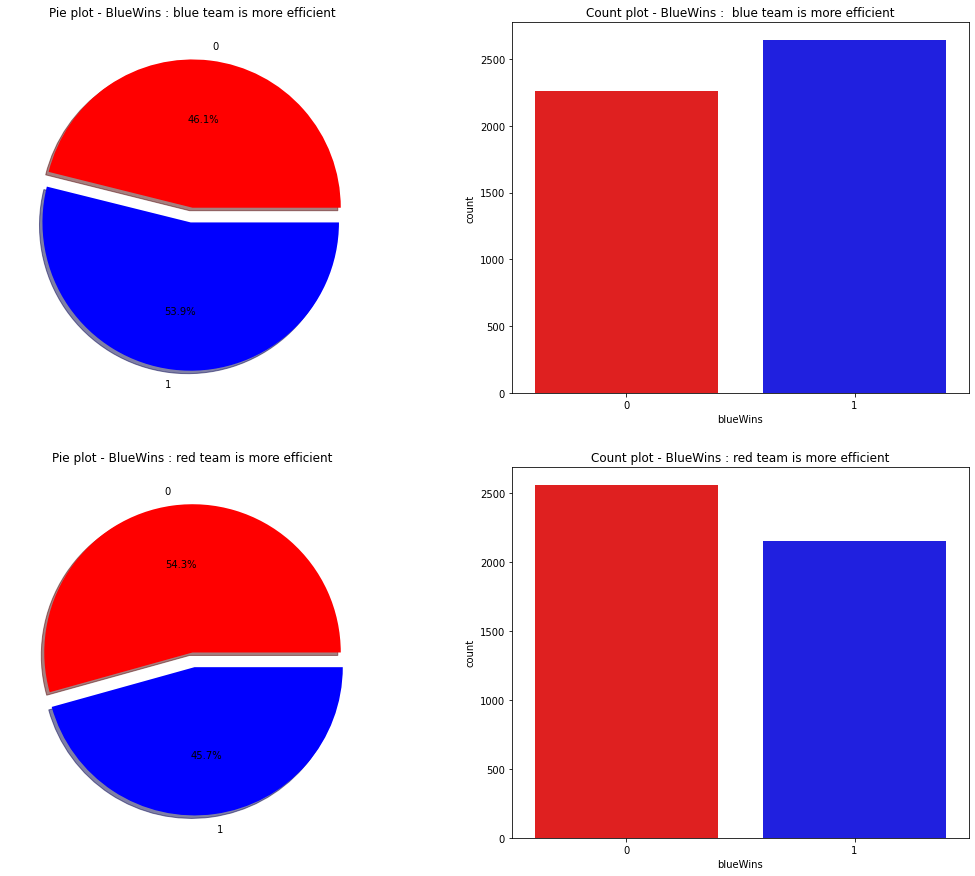

In [44]:
f, ax = plt.subplots(2, 2, figsize = (18,15))


df_blue_wards_3['blueWins'].value_counts().sort_values().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0, 0], shadow=True)
ax[0, 0].set_title('Pie plot - BlueWins : blue team is more efficient')
ax[0, 0].set_ylabel('')
sns.countplot('blueWins', data=df_blue_wards_3, ax=ax[0, 1])
ax[0, 1].set_title('Count plot - BlueWins :  blue team is more efficient')

df_red_wards_3['blueWins'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1, 0], shadow=True)
ax[1, 0].set_title('Pie plot - BlueWins : red team is more efficient')
ax[1, 0].set_ylabel('')
sns.countplot('blueWins', data=df_red_wards_3, ax=ax[1, 1])
ax[1, 1].set_title('Count plot - BlueWins : red team is more efficient')

plt.show()

* 총 9879개 데이터
    * 블루팀이 더 좋은 효율 : 4903 -> 2642게임 승리 : 53.9%
    * 레드팀이 더 좋은 효율 : 4709 -> 2558게임 승리 : 54.3%
    * 같은 효율 : 267

* **결론 : 54%정도의 확률로 와드 제거 효율이 좋은 팀이 게임을 이겼다.** 

### 3.2.4 와드 관련 최종 결론

* 승리 확률이 가장 높은 경우는 와드 제거 수만 따졌을 때이다.
* 그러나 제거 수는 같은 경우가 많아서 많은 데이터들이 빠졌기 때문에 승리를 예측하는데 제거 효율 관련 변수가 더 좋을 것 같다.
* 게임을 이기는데 있어서는 큰 차이는 없지만 와드를 설치하는 것보다 제거하는게 중요해보인다.